# Loading Libraries

In [172]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn import svm
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

# PART-A

## 1. Data Understanding:

**1.A Read all the 3 CSV iles as DataFrame and store them into 3 separate variables?**

In [173]:
df1=pd.read_csv('Part1+-+Normal.csv')

In [174]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [175]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,100.0,51.685244,12.368161,30.741938,42.817849,50.123115,61.470097,89.834676
P_tilt,100.0,12.821414,6.778503,-5.845994,8.799951,13.482435,16.785953,29.894119
L_angle,100.0,43.542605,12.361388,19.071075,35.000000,42.638923,51.602346,90.563461
S_slope,100.0,38.863830,9.624004,17.386972,32.340487,37.059694,44.608788,67.195460
P_radius,100.0,123.890834,9.014246,100.501192,118.182659,123.874328,129.040401,147.894637
S_Degree,100.0,2.186572,6.307483,-11.058179,-1.511360,1.152710,4.968807,31.172767


In [176]:
df1.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [177]:
df2 = pd.read_csv('Part1+-+Type_H.csv')

In [178]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [179]:
df2["Class"].unique()

array(['Type_H', 'type_h'], dtype=object)

In [180]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,60.0,47.638407,10.697131,26.147921,41.018099,46.416169,53.922329,74.433593
P_tilt,60.0,17.398795,7.016708,3.144669,12.874329,16.949285,22.002980,41.557331
L_angle,60.0,35.463524,9.767795,14.000000,29.038069,35.164873,42.011563,62.275275
S_slope,60.0,30.239612,7.555388,13.366931,25.215275,30.000659,34.962103,46.613539
P_radius,60.0,116.474968,9.355720,84.241415,112.280320,116.696146,122.042999,137.540613
S_Degree,60.0,2.480251,5.531177,-10.675871,-0.910819,2.542441,6.059666,15.779697


In [181]:
df3=pd.read_csv('Part1+-+Type_S.csv')

In [182]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,150.0,71.514224,15.109337,37.903910,60.658136,72.149306,81.075893,129.834041
P_tilt,150.0,20.748038,11.506169,-6.554948,13.461149,19.309548,29.229680,49.431864
L_angle,150.0,64.110108,16.397068,24.710274,52.000000,62.555200,76.990924,125.742385
S_slope,150.0,50.766186,12.318813,19.290046,43.166815,50.751695,56.675435,121.429566
P_radius,150.0,114.518810,15.579995,70.082575,104.706761,114.842400,123.337307,163.071041
S_Degree,150.0,51.896687,40.108030,1.010041,30.393271,42.372509,61.894425,418.543082


In [183]:
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [184]:
df3["Class"].unique()

array(['Type_S', 'tp_s'], dtype=object)

In [185]:
df = df1.append([df2,df3])

In [186]:
df.shape

(310, 7)

**1.B Print Shape and columns of all the 3 DataFrames.**

In [187]:
print(f"Shape of dataframes, df1, df2, df3: \n {df1.shape} \n {df2.shape} \n {df3.shape}")

Shape of dataframes, df1, df2, df3: 
 (100, 7) 
 (60, 7) 
 (150, 7)


**1.C Compare Column names of all the 3 DataFrames and clearly write observations.**

**Ans**: The column names of all the three dataframes are same and have same data types.

In [188]:
print(df1.columns.difference(df2.columns)) 
print(df2.columns.difference(df3.columns)) 
print(df1.columns.difference(df3.columns)) 

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


In [189]:
print(f"1. Column name dataframe1-{df1.columns}")

print(f"2. Column name dataframe1-{df2.columns}")

print(f"3. Column name dataframe1-{df3.columns}")

1. Column name dataframe1-Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
2. Column name dataframe1-Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
3. Column name dataframe1-Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


**1.D Print DataTypes of all the 3 DataFrames.**

In [190]:
print(f"{df1.info()} \n")  
print(f"{df2.info()} \n")
print(f"{df3.info()} \n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 n

**1.E Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.**

In [191]:
print(f"Unique values in dataframes, df1, df2, df3: \n {df1['Class'].unique()} \n {df2['Class'].unique()} \n {df3['Class'].unique()}")

Unique values in dataframes, df1, df2, df3: 
 ['Normal' 'Nrmal'] 
 ['Type_H' 'type_h'] 
 ['Type_S' 'tp_s']


## 2. Data Preparation and Exploration:

**2.A Unify all the variations in ‘Class’ feature for all the 3 DataFrames**

In [192]:
df1["Class"].replace("Nrmal", "Normal", regex=True, inplace=True)

In [193]:
df2["Class"].replace("type_h", "Type_H", regex=True, inplace=True)

In [194]:
df3["Class"].replace("tp_s", "Type_S", regex=True, inplace=True)

In [195]:
print(f"Unique values in dataframes, df1, df2, df3: \n {df1['Class'].unique()} \n {df2['Class'].unique()} \n {df3['Class'].unique()}")

Unique values in dataframes, df1, df2, df3: 
 ['Normal'] 
 ['Type_H'] 
 ['Type_S']


**2.B Combine all the 3 DataFrames to form a single DataFrame**

In [196]:
df = df1.append([df2,df3],ignore_index=True)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [198]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


**2.C Print 5 random samples of this DataFrame**

In [199]:
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
289,82.406524,29.276422,77.054565,53.130102,117.042244,62.765348,Type_S
61,42.515610,16.541216,42.000000,25.974394,120.631941,7.876731,Normal
172,84.974132,33.021175,60.859873,51.952957,125.659534,74.333409,Type_S
269,44.253476,1.101087,38.000000,43.152390,98.274107,23.910635,Type_S
181,74.005541,21.122402,57.379502,52.883139,120.205963,74.555166,Type_S


**2.D Print Feature-wise percentage of Null values.**

In [200]:
for column in df.columns:
    val = df[column].isnull().sum()/len(df[column])
    print(f"The percentage of null values in {column}: {val} %")

The percentage of null values in P_incidence: 0.0 %
The percentage of null values in P_tilt: 0.0 %
The percentage of null values in L_angle: 0.0 %
The percentage of null values in S_slope: 0.0 %
The percentage of null values in P_radius: 0.0 %
The percentage of null values in S_Degree: 0.0 %
The percentage of null values in Class: 0.0 %


**2.E Check 5-point summary of the new DataFrame.**

In [201]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


# 3. Data Analysis:

**3.A Visualize a heatmap to understand correlation between all features**

In [202]:
df["Class"].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

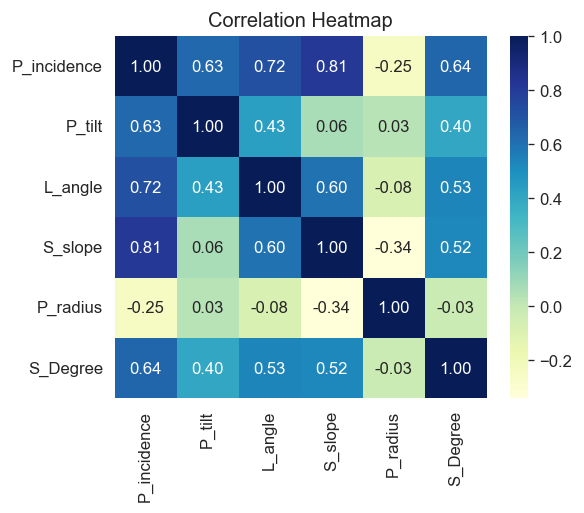

In [203]:
plt.figure(dpi = 120, figsize=(5,4))
corrmat = df.corr(method='pearson')
sns.heatmap(corrmat, cmap="YlGnBu", fmt='.2f',annot=True)
plt.title('Correlation Heatmap')
plt.yticks(rotation = 0)
plt.show();

**3.B Share insights on correlation.**

### <font color=darkblue> Insights on correlation.:
 
<font color=blue> 
 &nbsp;    
    
     A. "P_incidence" and "S_slope" have strong positive correlation value.
        
     B. "P_radius" and "S_slope" have high negative correlation value.
    
     C.  "P_incidence" has positive correlation with all features except for "P_radius".

**3.C Visualize a pairplot with 3 classes distinguished by colors and share insights.**

### <font color=darkblue> Insights from pairplot:
 
<font color=blue> 
 &nbsp;     

    1. Along the diagonal we can see distribution of variable for three claases are not same. 
       
    2. It is evident that Type_S class is more compared to other two.

    3. Normal class has higher values compared to Type_H
    
    4. Linear relationship between P_incidence, P_tilt, L_anlge, S_angle.

<Figure size 720x360 with 0 Axes>

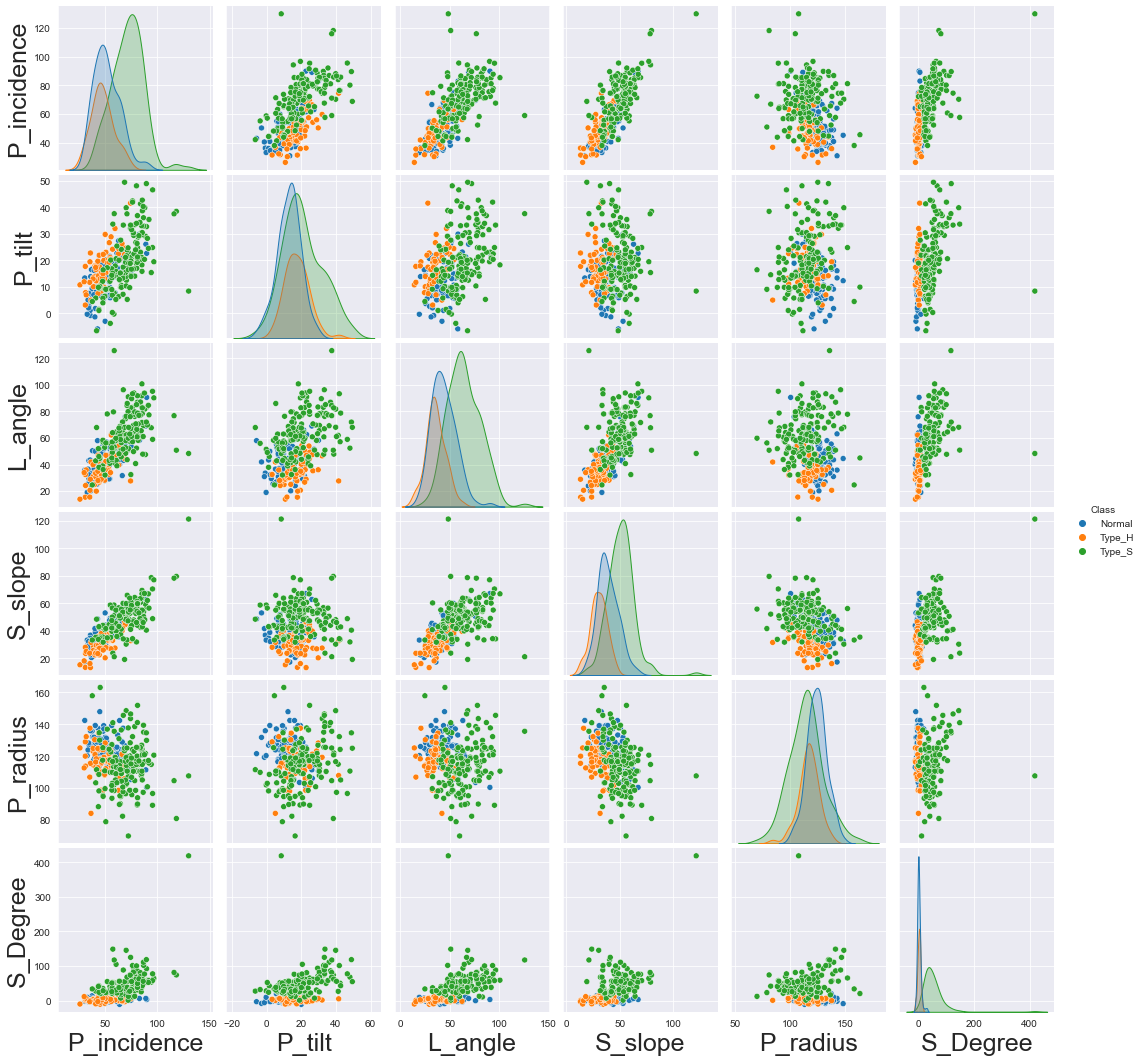

In [204]:
plt.figure(figsize=(10,5))
sns.pairplot(df,hue="Class");
plt.show()

**3.D Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.**

### <font color=darkblue> Insights from jointplot:
 
<font color=blue> 
 &nbsp;     

    1. "S_slope" and "P_incidence" linearly correlated . 
       
    2. "P_incidence" and "S_slope" is normaly distributed and positively skewed.

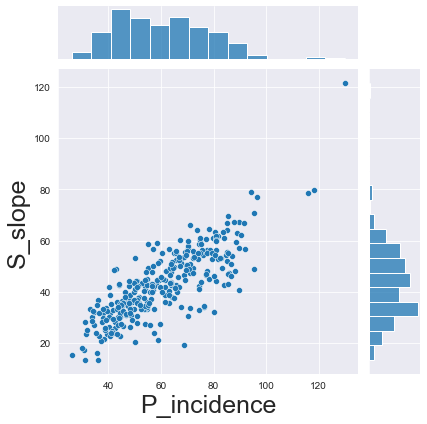

In [205]:
sns.jointplot(x="P_incidence",y="S_slope",data=df)

**3.E Visualize a boxplot to check distribution of the features and share insights.**

### <font color=darkblue> Insights from boxplot:
 
<font color=blue> 
 &nbsp;     

    1. All features are normally distributed with few of them positively skewed. 
       
    2. There are quiet few outliers in "P_tilt", "S_Degree" and "P_radius"
    
    3. "S_slope" and "L_angle" have one outlier only.

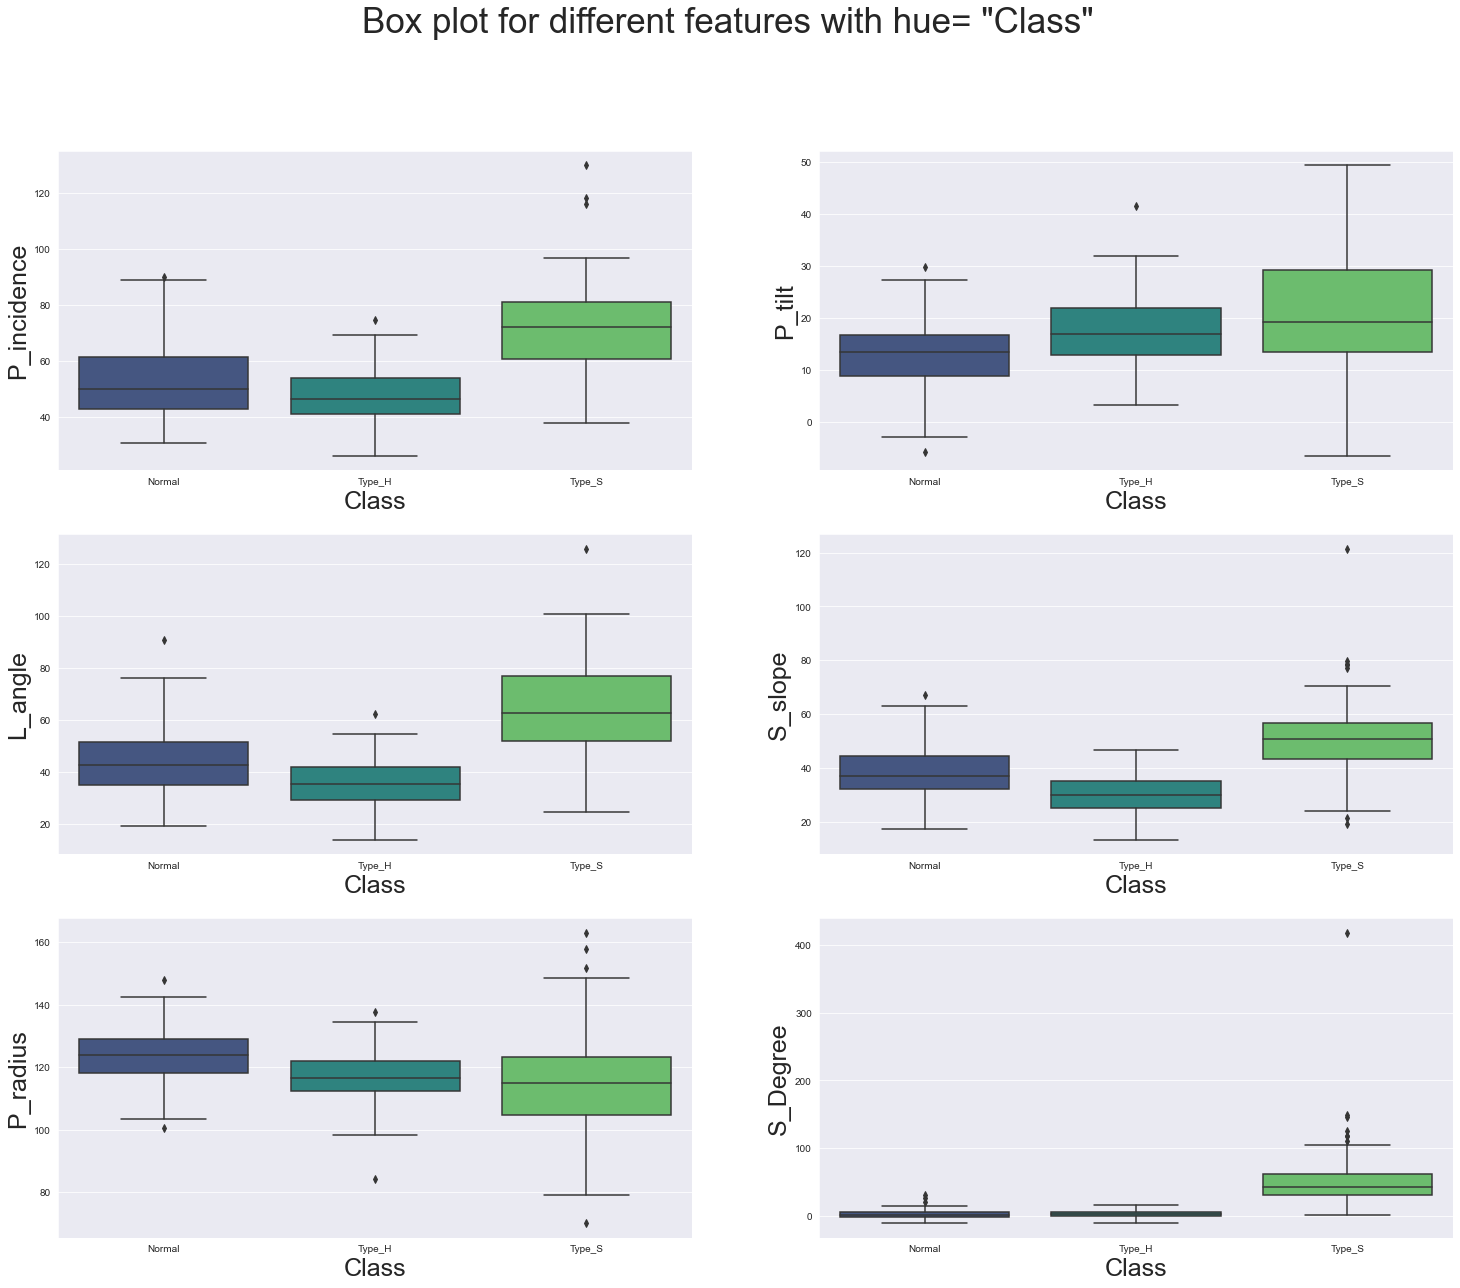

In [206]:
attrs = df.columns.drop('Class')
plt.figure(figsize=(25,20))
plt.rcParams["axes.labelsize"] = 25

index = 1
for col in df[attrs]:
    plt.subplot(3,2,index)
    sns.boxplot(x='Class',y=col,palette="viridis",data=df)
    index += 1
    
plt.suptitle('Box plot for different features with hue= "Class" ',  fontsize=35)
plt.show()

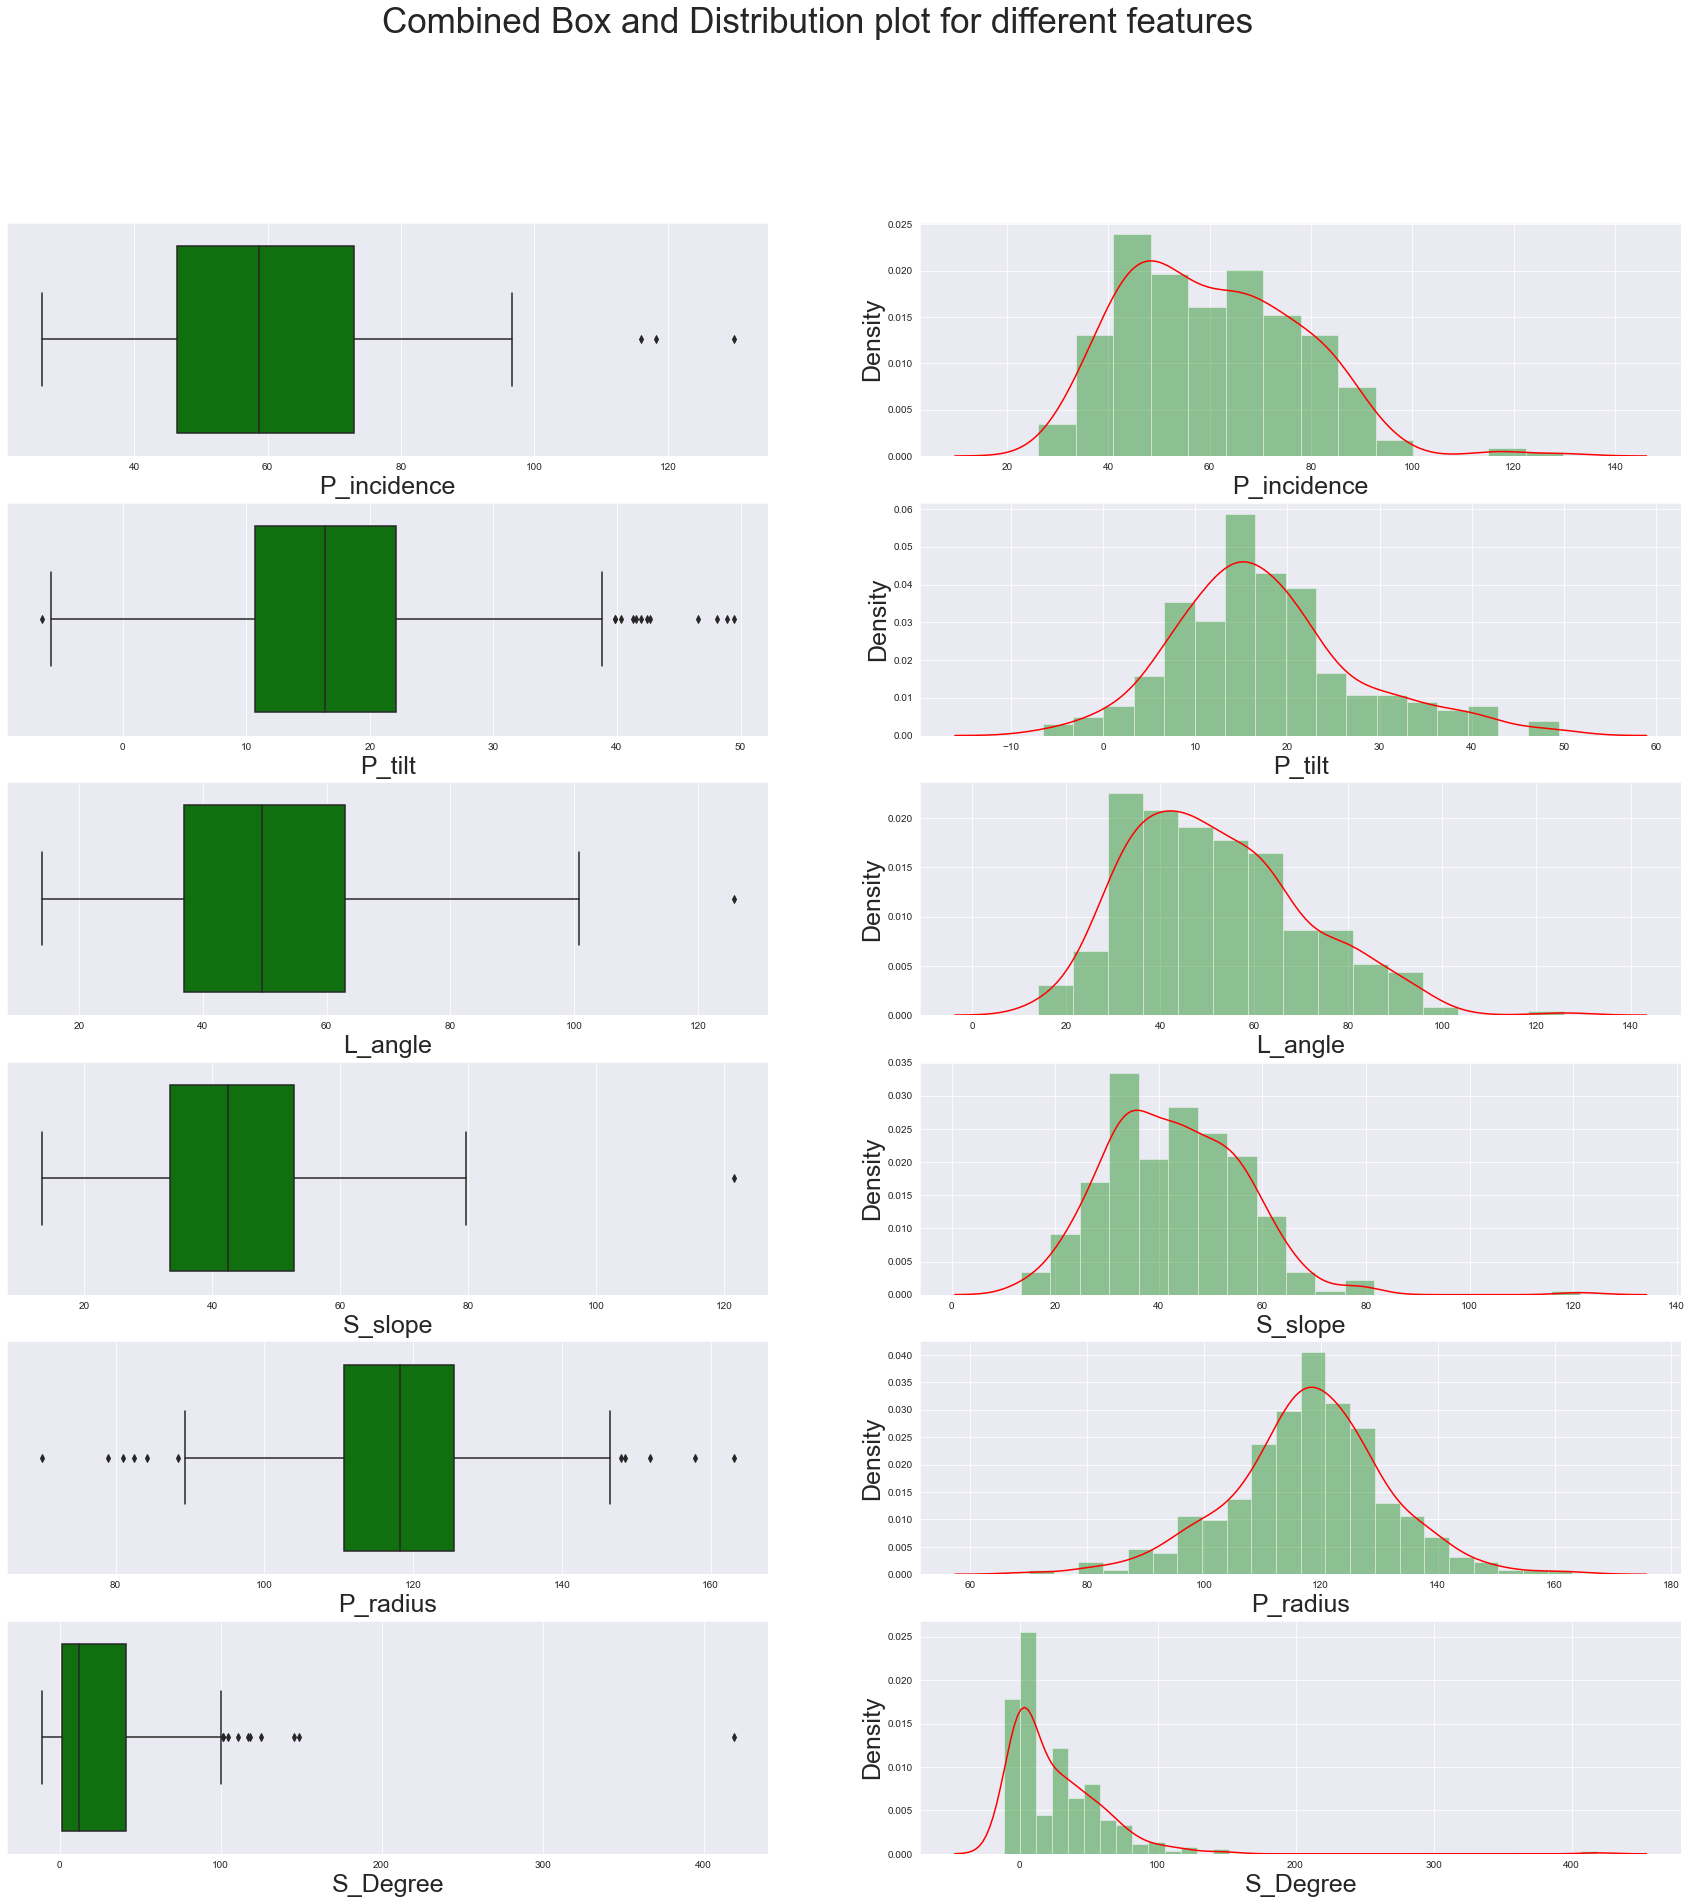

In [207]:
attrs = df.columns.drop('Class')
plt.figure(figsize=(30,30))
plt.rcParams["axes.labelsize"] = 25

index = 1
for col in df[attrs]:
    plt.subplot(6, 2, index)
    sns.boxplot(x = col, data=df,  orient='h',color='green')
    index += 1
    plt.subplot(6, 2, index)
    sns.distplot(df[col], color='Green', kde_kws={"color": "r"})
    index += 1
    
plt.suptitle("Combined Box and Distribution plot for different features",  fontsize=35)
plt.show()

**Removing Outliers**

In [208]:
def remove_outlier(col):
    sorted(col)
    q1, q3 = np.quantile(col, [0.25, 0.75])
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    return ll, ul

In [209]:
for i in df[
    [
        "P_incidence",
        "P_tilt",
        "L_angle",
        "S_slope",
        "P_radius",
        "S_Degree",  
    ]
]:
    if df[i].dtype != "object":
        ll, ul = remove_outlier(df[i])
        df[i] = np.where(df[i] > ul, ul, df[i])
        df[i] = np.where(df[i] < ll, ll, df[i])

# 4. Model Building:

In [210]:
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
df['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

**4.A Split data into X and Y.**

In [211]:
df['Class']=df['Class'].astype('category')

In [212]:
X=df.drop(columns='Class')
y=df['Class']

In [213]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.411958,16.945195,26.147921,46.430294,58.691038,72.877696,112.548797
P_tilt,310.0,17.377847,9.578631,-6.512919,10.667069,16.357689,22.120395,39.300383
L_angle,310.0,51.854341,18.295598,14.000000,37.000000,49.562398,63.000000,102.000000
S_slope,310.0,42.825732,12.848977,13.366931,33.347122,42.404912,52.695888,81.719038
P_radius,310.0,117.969164,12.635133,88.571479,110.709196,118.268178,125.467674,147.605392
S_Degree,310.0,24.735864,28.812259,-11.058179,1.603727,11.767934,41.287352,100.812790


In [214]:
X.shape

(310, 6)

## Scaling Independent Variables

In [215]:
X_Scaled = X.apply(zscore)

In [216]:
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,2.750488e-16,1.001617,-2.025320,-0.826445,-0.101722,0.736840,3.081767
P_tilt,310.0,1.604451e-16,1.001617,-2.498206,-0.701732,-0.106676,0.495918,2.292392
L_angle,310.0,-1.833659e-16,1.001617,-2.072386,-0.813221,-0.125475,0.610184,2.745291
S_slope,310.0,-4.125732e-16,1.001617,-2.296403,-0.738886,-0.032804,0.769409,3.031851
P_radius,310.0,2.979695e-16,1.001617,-2.330424,-0.575515,0.023704,0.594425,2.349334
S_Degree,310.0,1.375244e-16,1.001617,-1.244328,-0.804156,-0.450811,0.575389,2.644705


**4.B Split data into train and test with 80:20 proportion.**

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

**4.C Train a Supervised Learning Classi ication base model using KNN classifier.**

In [218]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean')

In [219]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

**4.D Print all the possible performance metrics for both train and test data.**

## <font color=darkblue> Performance metrics for train and test data:
 
<font color=blue> 
 &nbsp;     

    1. Training Acuracy is 0.89 and Testing Accuracy is 0.83. 
    2. Performance is less in test data.
    3. This is due to overfitting of data

In [220]:
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.8911290322580645
Accuracy on Test data: 0.8387096774193549


## Confussion Matrix

## <font color=darkblue> Performance metrics for train and test data:
 
<font color=blue> 
 &nbsp;     

    1. Our model predicts Type_S correctly most of the time. Only three misclassification on this class.
    2. Misclassification of labels are more when predicting Normal class.

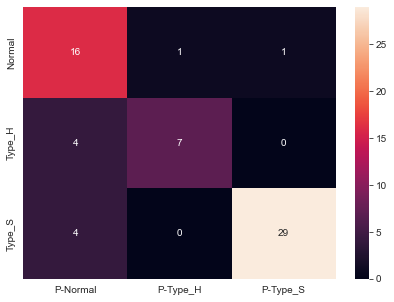

In [221]:
cm = confusion_matrix(y_test, predicted_labels, labels=[0,1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["P-Normal","P-Type_H","P-Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [222]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        18
           1       0.88      0.64      0.74        11
           2       0.97      0.88      0.92        33

    accuracy                           0.84        62
   macro avg       0.84      0.80      0.81        62
weighted avg       0.86      0.84      0.84        62



# 5. Performance Improvement:

**5.A Experiment with various parameters to improve performance of the base model.**

### Finding best K value:

In [223]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k, metric = 'euclidean') 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

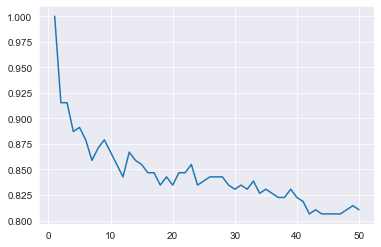

In [224]:
plt.plot(range(1,51),train_score)
plt.show()

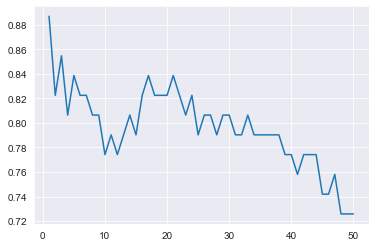

In [225]:
plt.plot(range(1,51),test_score)
plt.show()

1. The maximum accuracy occures when k between 20-25.

2. We will fix k value as less than 25.

**5.B Clearly showcase improvement in performance achieved.**

In [226]:
k=[1,3,5,7,9,11,13,15,17,19, 21,23,25]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean') 
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.8870967741935484:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.89      0.73      0.80        11
           2       0.97      0.91      0.94        33

    accuracy                           0.89        62
   macro avg       0.88      0.86      0.86        62
weighted avg       0.90      0.89      0.89        62

Accuracy on Training data for k 3 is 0.9153225806451613:
Accuracy on Test data for k 3 is 0.8548387096774194:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80        18
           1       0.78      0.64      0.70        11
           2       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.86      0.85     

1. For K=21 we have balanced train and test error.
2. We can use k value as 21 because when we increase this value the precision becomes 97% for class 2.
3. Although the accuracy is same as before but the precision for different classes has improved.

**5.C Clearly state which parameters contributed most to improve model performance.**

**Ans**: Looking at the classification matrix we find that class 2 has maximum influence on 
deciding the factor k. 

# PART-B

## 1. Data Understanding and Preparation:

**1.A Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.**

In [258]:
df_1=pd.read_csv('Part2+-+Data1.csv')
df_2=pd.read_csv('Part2+-Data2.csv')

**1.B Print shape and Column Names and DataTypes of both the Dataframes.**

In [259]:
i=1
for df in [df_1,df_2]:
    print(f'Shape of dataframe-{i} {df.shape} \n')
    print(f'Data types of dataframe-{i} {df.info()} \n')
    i += 1

Shape of dataframe-1 (5000, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
Data types of dataframe-1 None 

Shape of dataframe-2 (5000, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-nu

**1.C Merge both the Dataframes on ‘ID’ feature to form a single DataFrame**

In [260]:
df_new = df_1.merge(df_2,left_on='ID',right_on='ID')

**1.D Change Datatype of below features to ‘Object’**

In [261]:
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard']
for i in col:
    df_new[i]=df_new[i].astype('object')

In [262]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


## 2. Data Exploration and Analysis:

**2.A Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.**

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

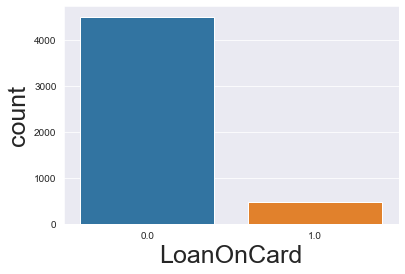

In [263]:
sns.countplot(df_new.LoanOnCard)

### <font color=darkblue> Insights from countplot:
 
<font color=blue> 
 &nbsp;     

    1. The feature/independent variable "LoanOnCard" is a categorical variable with 0/1 value for
        customers with/without loan. 
       
    2. The data type of "LoanOnCard" will be changed to categorical for better analysis. 

In [264]:
df_new["LoanOnCard"] = df_new["LoanOnCard"].astype('category')

**2.B Check the percentage of missing values and impute if required.**

In [265]:
for column in df_new.columns:
    val = df_new[column].isnull().sum()/len(df_new[column])
    print(f"The percentage of null values in {column}: {val} %")

The percentage of null values in ID: 0.0 %
The percentage of null values in Age: 0.0 %
The percentage of null values in CustomerSince: 0.0 %
The percentage of null values in HighestSpend: 0.0 %
The percentage of null values in ZipCode: 0.0 %
The percentage of null values in HiddenScore: 0.0 %
The percentage of null values in MonthlyAverageSpend: 0.0 %
The percentage of null values in Level: 0.0 %
The percentage of null values in Mortgage: 0.0 %
The percentage of null values in Security: 0.0 %
The percentage of null values in FixedDepositAccount: 0.0 %
The percentage of null values in InternetBanking: 0.0 %
The percentage of null values in CreditCard: 0.0 %
The percentage of null values in LoanOnCard: 0.004 %


**We find that "LoanOnCard" has few missing values, dropping those values and preparing the dataframe.**

In [266]:
df_new.dropna(axis=0,inplace=True)

In [267]:
df_new.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

**2.C Check for unexpected values in each categorical variable and impute with best suitable value.**

In [268]:
df_new.nunique()

ID                     4980
Age                      45
CustomerSince            47
HighestSpend            162
ZipCode                 467
HiddenScore               4
MonthlyAverageSpend     108
Level                     3
Mortgage                347
Security                  2
FixedDepositAccount       2
InternetBanking           2
CreditCard                2
LoanOnCard                2
dtype: int64

**There are no unexpected values in each categorical variables**

## 3. Data Preparation and model building:

**3.A Split data into X and Y.**

In [269]:
X = df_new.drop(['ID','ZipCode','LoanOnCard'], axis = 1)
y=df_new['LoanOnCard']

**3.B Split data into train and test. Keep 25% data reserved for testing.**

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

**3.C Train a Supervised Learning Classification base model - Logistic Regression.**

In [271]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

**3.D Print evaluation metrics for the model and clearly share insights.**

In [272]:
print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9496653279785809
Accuracy on Test data: 0.9437751004016064


**94.9% accuracy on training set and 94.3% accuracy on test set.**

**Here training set accuracy and testing accuracy are balanced when model is built without sampling.**

**Accuracy is good**

### Confusion Matrix

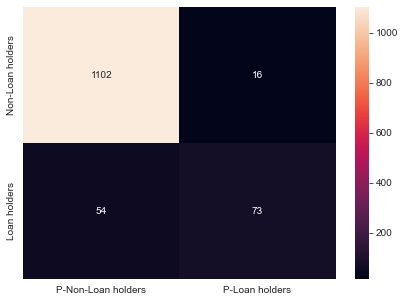

In [273]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["P-Non-Loan holders","P-Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

1.In the above figure 54 and 16 are the errors in the model.

**3.E Balance the data using the right balancing technique.**

In [274]:
X = df_new.drop(['ID','ZipCode','LoanOnCard'], axis = 1)
y=df_new['LoanOnCard']

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [276]:
# 1. Check balance of target variable
print(f'Test data imbalance:\n{y_test.value_counts()} \n\nTrain data imbalance:\n{y_train.value_counts()}')

Test data imbalance:
0.0    1118
1.0     127
Name: LoanOnCard, dtype: int64 

Train data imbalance:
0.0    3382
1.0     353
Name: LoanOnCard, dtype: int64


In [277]:
features = df_new.drop(columns=['ID','ZipCode','LoanOnCard']).columns

In [278]:
count_class_0, count_class_1 = df_new["LoanOnCard"].value_counts()

In [279]:
df_class_0 = df_new[df_new["LoanOnCard"] == 0]
df_class_1 = df_new[df_new["LoanOnCard"] == 1]

In [280]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True, random_state=1)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over["LoanOnCard"].value_counts())

Random over-sampling:
0.0    4500
1.0    4500
Name: LoanOnCard, dtype: int64


In [281]:
X = df_test_over.drop(['ID','ZipCode','LoanOnCard'], axis = 1)
y = df_test_over['LoanOnCard']

from sklearn.model_selection import train_test_split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

**The training sample has been balanced now**

In [282]:
y_train_b.value_counts()

0.0    3600
1.0    3600
Name: LoanOnCard, dtype: int64

**3.F Again train the same previous model on balanced data**

In [284]:
logit.fit(X_train_b, y_train_b)
y_pred_b = logit.predict_proba(X_test_b)[:,1]
predicted_labels = logit.predict(X_test_b)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_b, y_pred_b)

0.9613580246913581

**3.G Print evaluation metrics and clearly share differences observed.**

### <font color=darkblue> Observations and evaluation metrics:
 
<font color=blue> 
 &nbsp;     

    1. Accuracy is better with unbalanced data.
       
    2. Precision, recall and f-1 score of class "1" has improved with balanced data.

In [285]:
print("classification  Matrix:Balanced Data\n",classification_report(y_test_b,predicted_labels))

classification  Matrix:Balanced Data
               precision    recall  f1-score   support

         0.0       0.90      0.89      0.89       900
         1.0       0.89      0.90      0.89       900

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800



In [286]:
print("classification  Matrix:Unbalanced Data\n",classification_report(y_test,logit_pred))

classification  Matrix:Unbalanced Data
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.82      0.57      0.68       127

    accuracy                           0.94      1245
   macro avg       0.89      0.78      0.82      1245
weighted avg       0.94      0.94      0.94      1245



## 4. Performance Improvement:

**4.A Train a base model each for SVM, KNN.**

**SVM**

In [287]:
X_SVM = df_new.drop(['ID','ZipCode','LoanOnCard'], axis = 1)
y_SVM = df_new['LoanOnCard']

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X_SVM, y_SVM, test_size=0.25, random_state=1)

In [289]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction_linear = svc_model.predict(X_test)

In [290]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9531459170013387
0.9477911646586346


Confusion Matrix: SVM(linear)


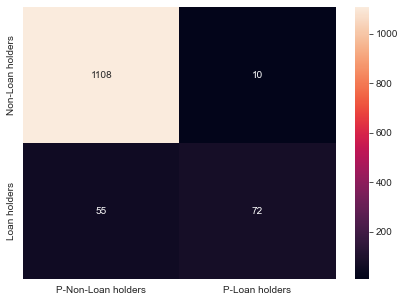

In [291]:
cm = confusion_matrix(y_test, prediction_linear, labels=[0, 1])

print("Confusion Matrix: SVM(linear)")
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["P-Non-Loan holders","P-Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [292]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

prediction_rbf = svc_model .predict(X_test)

In [293]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9111111111111111
0.9028112449799197


Confusion Matrix:SVM(rbf)


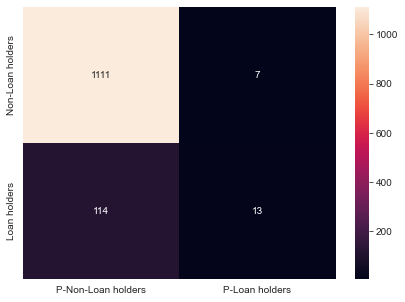

In [294]:
cm = confusion_matrix(y_test, prediction_rbf, labels=[0, 1])

print("Confusion Matrix:SVM(rbf)")
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["P-Non-Loan holders","P-Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

**Lookin at the scores for different SVM kernels, Linear kernel is better for SVM**

**KNN**

In [295]:
X_KNN = df_new.drop(['ID','ZipCode','LoanOnCard'], axis = 1)
y_KNN = df_new['LoanOnCard']

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X_KNN, y_KNN, test_size=0.25, random_state=1)

In [297]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [298]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [299]:
predicted_KNN = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9004016064257028

Confusion Matrix: KNN


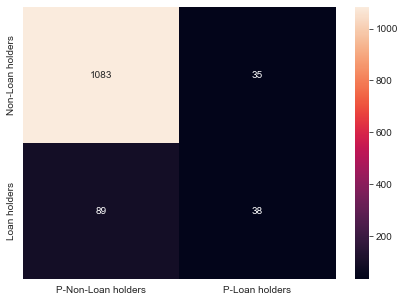

In [300]:
cm = confusion_matrix(y_test, predicted_KNN, labels=[0, 1])

print("Confusion Matrix: KNN")
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["P-Non-Loan holders","P-Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [301]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

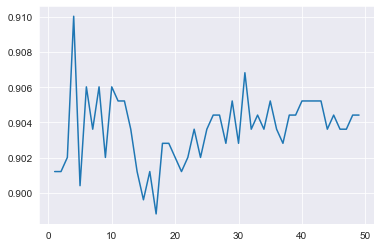

In [302]:
plt.plot(range(1,50),scores)

**The maximum accuracy is at k=5**

**4.C Print evaluation metrics for final model**

### <font color=darkblue> Evaluation metrics for final model compared:
 
<font color=blue> 
 &nbsp;     

In [303]:
print("classification  Matrix:KNN\n",classification_report(y_test,predicted_KNN))

classification  Matrix:KNN
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1118
         1.0       0.52      0.30      0.38       127

    accuracy                           0.90      1245
   macro avg       0.72      0.63      0.66      1245
weighted avg       0.88      0.90      0.89      1245



In [304]:
print("classification  Matrix:SVM(linear)\n",classification_report(y_test,prediction_linear))

classification  Matrix:SVM(linear)
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.88      0.57      0.69       127

    accuracy                           0.95      1245
   macro avg       0.92      0.78      0.83      1245
weighted avg       0.95      0.95      0.94      1245



**4.D Share improvement achieved from base model to final model.**

### <font color=darkblue> Improvements from base model to final model:
 
<font color=blue> 
 &nbsp;     

    1. In the final SVM(linear) model has slightly higher accuracy and precision than base model. 
       
    2. Final KNN model has lower accuracy and precision compared to base model.